In [ ]:
# DATA

# Our dataset is in a Github Repository(link below) and will be cloned here.
!git clone https://github.com/anushapant/Data-IML.git

Cloning into 'Data-IML'...
remote: Enumerating objects: 11630, done.
remote: Counting objects: 100% (11630/11630), done.
remote: Compressing objects: 100% (11630/11630), done.
remote: Total 11630 (delta 0), reused 11630 (delta 0), pack-reused 0
Receiving objects: 100% (11630/11630), 326.21 MiB | 33.21 MiB/s, done.
Checking out files: 100% (11792/11792), done.


In [ ]:
# LIBRARIES THAT NEED TO BE IMPORTED

import numpy as np # for arrays and matrices
import matplotlib.pyplot as plt # plotting
from keras.models import Sequential 
from keras.layers import *
from keras.preprocessing.image import *
from keras.applications.vgg19 import VGG19
import cv2

In [ ]:
# DATA AUGMENTATION
batchSize = 64
# referred to tensorflow's documentation for usage and values
train_aug_data_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_validation_aug_data_gen = ImageDataGenerator(rescale=1.0/255)

# we are not giving flow_from_directory any value in the 'classes' arguement. In this case, it infers the classes based on the directory structure, with each subdirectory being a different class.
train_data_generator = train_aug_data_gen.flow_from_directory(
        'Data-IML/Train',
        target_size=(128, 128),
        batch_size=batchSize,
        class_mode='categorical')
test_data_generator = test_validation_aug_data_gen.flow_from_directory(
        'Data-IML/Test',
        target_size=(128, 128),
        batch_size=batchSize,
        class_mode='categorical')
validation_data_generator = test_validation_aug_data_gen.flow_from_directory(
        'Data-IML/Validation',
        target_size=(128, 128),
        batch_size=batchSize,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
base = VGG19(include_top=False, weights='imagenet', input_shape=(128,128,3)) #referred to tf's VGG19 documentation and application example

# we changed the layers to no longer be trainable because we are fine-tuning the VGG19 model by training only the top layer
# if this is not done, the will massive overfitting since the model is huge but our dataset of 12K images is small
for l in base.layers:
  l.trainable = False

model = Sequential([base,Flatten(), Dense(2,activation='sigmoid')])

# based on research online, we determined that the Adam optimizer seems to be an ideal option for us
# we also compared the performance in the case of the Adam optimizer and the RMSprop optimizer, where the former led to better results

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy']) 

stepsEpoch = int(len(train_data_generator)) # recommended to be number of total training samples/ training batch size
validationSteps = int(len(validation_data_generator)) # recommended to be number of total validation samples/ validation batch size

# Here, rather than using model.fit, we are using model.fit_generator since we want the data to be augmented as per the specifications mentioned previously, for which we require the generator
# we have already mentioned the batch size in the data_generators 

MODEL = model.fit_generator(generator=train_data_generator, validation_data=validation_data_generator, epochs=7, steps_per_epoch=stepsEpoch, validation_steps=validationSteps)

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/7
157/157 [==============================] - 86s 444ms/step - loss: 0.0992 - accuracy: 0.9639 - val_loss: 0.0291 - val_accuracy: 0.9925
Epoch 2/7
157/157 [==============================] - 64s 405ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.0215 - val_accuracy: 0.9937
Epoch 3/7
157/157 [==============================] - 63s 400ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0110 - val_accuracy: 0.9987
Epoch 4/7
157/157 [==============================] - 64s 405ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0092 - val_accuracy: 0.9987
Epoch 5/7
157/157 [==============================] - 63s 403ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0101 - val_accuracy: 0.9987
Epoch 6/7
157/157 [==============================] - 63s 401ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 7/7
157/157 [==============================] - 63s 399ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0127 - val_accuracy:

In [ ]:
# A trained version of this model (with 98.89% accuracy) has been saved and uploaded Github. It is being loaded from there in our Results notebook, where we are testing it with images.

# Given below are loss and accuracy vs number of epoch graphs for this particular training run. 
# In the loss plot, we see that both the training and validation loss are gradually decreasing. However, as number of epochs increases, they start increasing again because of overfitting.
# In the accuracy plot, we see both the training and validation loss gradually increasing. As the number of epochs increase, however, they both start falling. 

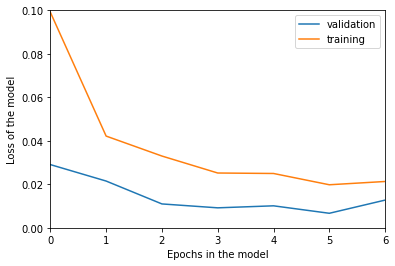

In [ ]:
# Plot of the model's loss


plt.plot(MODEL.history["val_loss"])
plt.plot(MODEL.history["loss"])
plt.xlabel("Epochs in the model")
plt.ylabel("Loss of the model")
plt.legend(['validation', 'training'])
plt.xlim(0,6)
plt.ylim(0, 0.1)
plt.show()

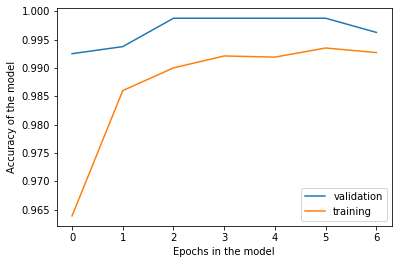

In [ ]:
# Plot of the model's accuracy


plt.plot(MODEL.history["val_accuracy"])
plt.plot(MODEL.history["accuracy"])
plt.xlabel("Epochs in the model")
plt.ylabel("Accuracy of the model")
plt.legend(['validation', 'training'])
plt.show()